# Transformations isométriques

Correction de l'exercice.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.set_printoptions(precision=3, linewidth=150, suppress=True)
plt.style.use(['seaborn-v0_8-whitegrid','cours.mplstyle'])

In [3]:
angle = np.linspace(-np.pi/2,np.pi/2,7)

shape1 = np.concatenate([np.array([np.cos(angle), np.sin(angle)]), \
                         np.array([[-0.5, -1, -1, -1], [1, 1, 0.5, 0]]), \
                         np.array([[-0.5, 0], [-0.5, -1]])], axis=1)

shape1_3d = np.concatenate([shape1, np.ones((1, len(shape1[0])))], axis=0)

## Exercice

Écrire sous forme d'un produit matriciel la symétrie axiale par rapport à un axe qui ne passe pas par (0,0).
On prendra l'axe qui passe par (2,0) et qui a un angle de π/3 par rapport à l'horizontale.

Est-ce un automorphisme orthogonal ? Le montrer.

Matrix of symmetry:
 [[-0.5    0.866  3.   ]
 [ 0.866  0.5   -1.732]
 [ 0.     0.     1.   ]]


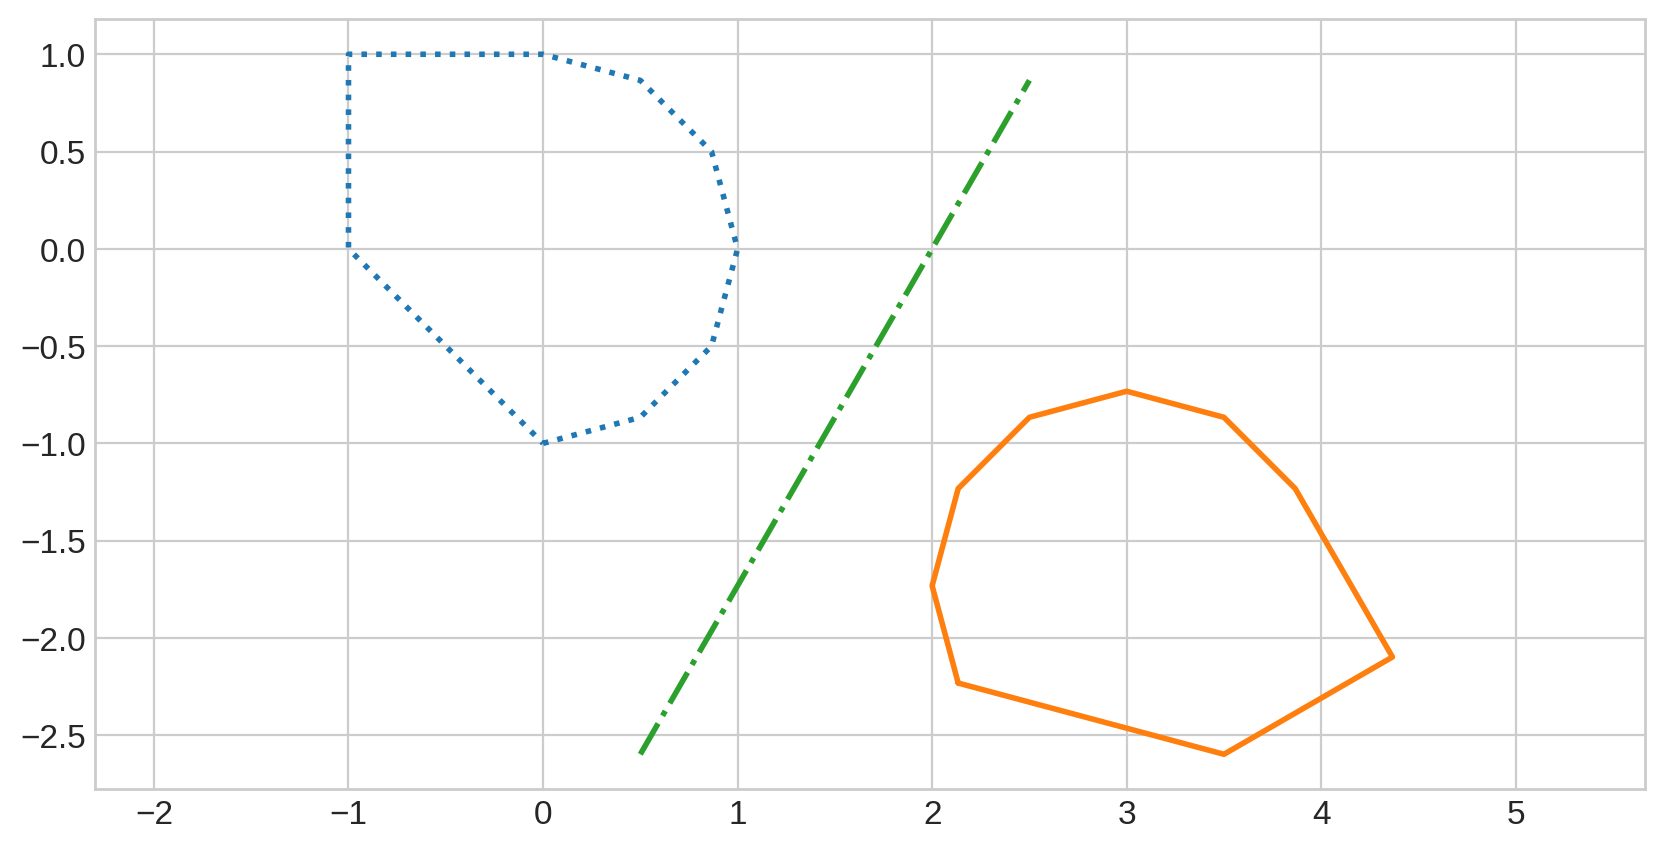

In [4]:
def R3(α):
    return np.array([[np.cos(α), -np.sin(α), 0], [np.sin(α), np.cos(α), 0], [0, 0, 1]])

Sx3 = np.array([[1,0,0], [0,-1,0], [0,0,1]])

def T(v):  # translation of v
    T = np.identity(3)
    T[0:2,2] = v
    return T

θ = np.pi / 3
a = np.array([2,0])

S =  T(a) @ R3(θ) @ Sx3 @ R3(-θ) @ T(-a)
print("Matrix of symmetry:\n", S)

shape2 = S @ shape1_3d

plt.plot(shape1[0], shape1[1], ":")
plt.plot(shape2[0], shape2[1])
plt.plot([a[0]-3*np.cos(θ),a[0]+np.cos(θ)],[a[1]-3*np.sin(θ),a[1]+np.sin(θ)], "-.")  # axe de symétrie
plt.axis('equal');

In [5]:
# Ce n'est pas un automorphisme orthogonal car S n'est pas orthogonale :

S @ S.T  #  différent de l'identité

array([[10.   , -5.196,  3.   ],
       [-5.196,  4.   , -1.732],
       [ 3.   , -1.732,  1.   ]])